# Basic Exploration of REVISE outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from jax.nn import relu, sigmoid
import matplotlib.pyplot as plt
import numpy as np


from nn_models import Feedforward
from vae import VAE
from revise import Revise

%matplotlib inline

## Generate Data

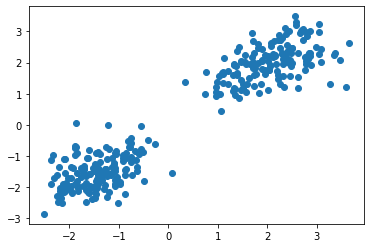

In [3]:
c_means = [[-1.5, -1.5], [2.0, 2.0]]
c_var = 0.30**2
x_var = 1e-2

np.random.seed(0)
indices = np.random.randint(2, size=300)
samples = [
    np.random.multivariate_normal(c_means[i], c_var * np.eye(2) + 0.2 * np.ones((2, 2))) + 
           np.random.multivariate_normal(np.zeros(2), x_var**0.5 * np.eye(2)) 
           for i in indices]

x_train = np.array(samples)
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

## Construct Encoder, Decoder, VAE

In [7]:
#decoder architecture
input_dim = 2
output_dim = 2
width = 50
hidden_layers = 1
activation_fn_type = 'relu'
activation_fn = relu
output_activation_type = 'linear'
output_activation_fn = lambda x: x
# activation_fn_type = 'linear'
# activation_fn = lambda x: x
decoder_architecture = {'width': [width] * hidden_layers,
                'hidden_layers': hidden_layers,
                'input_dim': input_dim,
                'output_dim': output_dim,
                'activation_fn_type': activation_fn_type,
                'activation_fn': activation_fn,
                'activation_fn_params': None,
                'output_activation_type': output_activation_type,
                'output_activation_fn': output_activation_fn,
                'task': 'regression'}


#encoder architecture
input_dim = 2
output_dim = 4
width = 50
hidden_layers = 1
# activation_fn_type = 'relu'
# activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

encoder_architecture = {'width': [width] * hidden_layers,
                'hidden_layers': hidden_layers,
                'input_dim': input_dim,
                'output_dim': output_dim,
                'activation_fn_type': activation_fn_type,
                'activation_fn': activation_fn,
                'activation_fn_params': None,
                'output_activation_type': output_activation_type,
                'output_activation_fn': output_activation_fn,
                'task': 'regression'}

vae = VAE(decoder_architecture, encoder_architecture, x_var)

In [8]:
#import jax.profiler
#server = jax.profiler.start_server(9999)

In [9]:
params = {
    'step_size':1e-2,
    'max_iteration':5000,
    'random_restarts':1,
 }

vae.fit(x_train.T, params=params, S=50)

Iteration 0 lower bound 452.1850; gradient mag: 779.7526
Iteration 100 lower bound 5.5786; gradient mag: 5.0560
Iteration 200 lower bound 3.9120; gradient mag: 2.8045
Iteration 300 lower bound 3.3382; gradient mag: 1.6626
Iteration 400 lower bound 3.0536; gradient mag: 2.4210
Iteration 500 lower bound 2.9344; gradient mag: 2.1321
Iteration 600 lower bound 2.8724; gradient mag: 7.6228
Iteration 700 lower bound 2.9269; gradient mag: 43.5206
Iteration 800 lower bound 2.8074; gradient mag: 11.4113
Iteration 900 lower bound 2.7711; gradient mag: 2.2391
Iteration 1000 lower bound 2.7621; gradient mag: 10.8130
Iteration 1100 lower bound 2.7721; gradient mag: 24.4413
Iteration 1200 lower bound 2.7246; gradient mag: 5.8354
Iteration 1300 lower bound 2.7155; gradient mag: 3.5920
Iteration 1400 lower bound 2.7005; gradient mag: 4.8378
Iteration 1500 lower bound 2.7103; gradient mag: 18.4154
Iteration 1600 lower bound 2.7974; gradient mag: 44.3672
Iteration 1700 lower bound 2.6811; gradient mag: 1

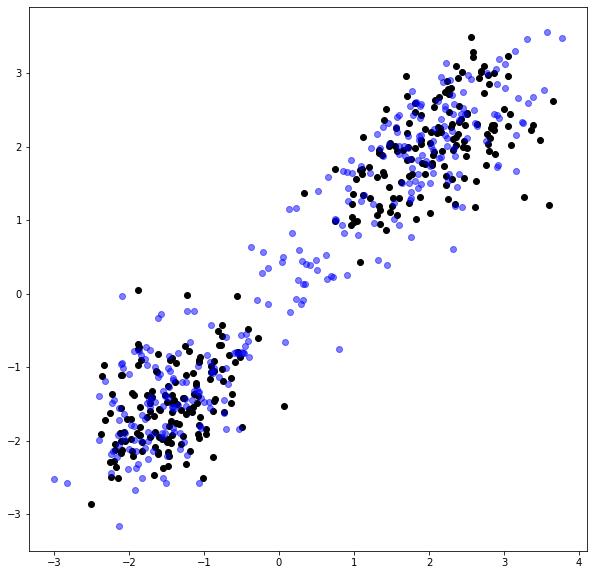

In [12]:
x_hat = vae.generate(N=300)
x_hat = x_hat + np.random.normal(0, x_var**0.5, size=x_hat.shape)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x_train.T[0], x_train.T[1], color='black')
ax.scatter(x_hat[0], x_hat[1], color='blue', alpha=0.5)

plt.show()

## Build the Classifier

In [18]:
width = 100
hidden_layers = 1
input_dim = 2
output_dim = 1
activation_fn_type = 'relu'
activation_fn = relu
output_activation_type = 'logistic'
output_activation_fn = sigmoid

classifier_architecture = {
    'width': [width] * hidden_layers,
    'hidden_layers': hidden_layers,
    'input_dim': input_dim,
    'output_dim': output_dim,
    'activation_fn_type': activation_fn_type,
    'activation_fn': activation_fn,
    'activation_fn_params': None,
    'output_activation_type': output_activation_type,
    'output_activation_fn': output_activation_fn,
    'task': 'classification'
}

classifier = Feedforward(classifier_architecture)

In [19]:
params = {
    'step_size':1e-2,
    'max_iteration':5000,
    'random_restarts':1,
 }

X_mean = x_train.mean()
X_std = x_train.std()
X_train = (x_train - X_mean) / X_std
classifier.fit(X_train.T, indices.reshape(1,-1), params)

Iteration 0 lower bound 2594.9111; gradient mag: 3408.2048
Iteration 100 lower bound 0.1499; gradient mag: 1.3276
Iteration 200 lower bound 0.1061; gradient mag: 0.7576
Iteration 300 lower bound 0.0872; gradient mag: 0.5132
Iteration 400 lower bound 0.0765; gradient mag: 0.4105
Iteration 500 lower bound 0.0687; gradient mag: 0.3562
Iteration 600 lower bound 0.0619; gradient mag: 0.3183
Iteration 700 lower bound 0.0557; gradient mag: 0.2880
Iteration 800 lower bound 0.0502; gradient mag: 0.2592
Iteration 900 lower bound 0.0454; gradient mag: 0.2337
Iteration 1000 lower bound 0.0410; gradient mag: 0.2111
Iteration 1100 lower bound 0.0372; gradient mag: 0.1911
Iteration 1200 lower bound 0.0337; gradient mag: 0.1734
Iteration 1300 lower bound 0.0307; gradient mag: 0.1577
Iteration 1400 lower bound 0.0280; gradient mag: 0.1436
Iteration 1500 lower bound 0.0256; gradient mag: 0.1312
Iteration 1600 lower bound 0.0235; gradient mag: 0.1201
Iteration 1700 lower bound 0.0216; gradient mag: 0.110

## Look at Predictions

In [20]:
preds = classifier.predict(X_train)

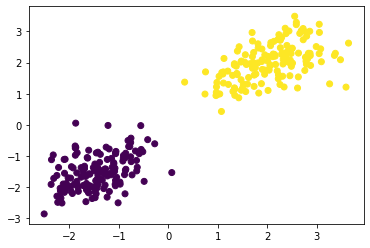

In [21]:
plt.scatter(x_train.T[0], x_train.T[1], c=indices)

plt.show()

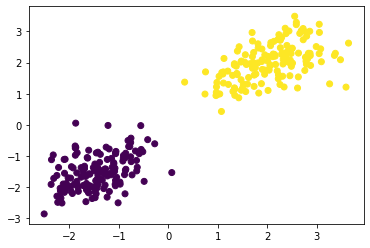

In [22]:
plt.scatter(x_train.T[0], x_train.T[1], c=preds)

plt.show()

## Pick a Point for Recourse

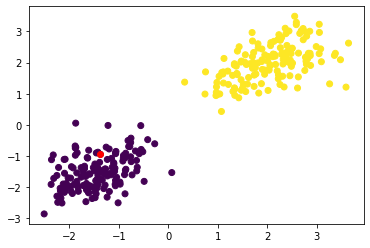

In [24]:
chosen_point = x_train[3]
plt.scatter(x_train.T[0], x_train.T[1], c=indices)
plt.scatter(*chosen_point.T, color='red')

plt.show()

## Run REVISE and Generate Graphs

In [41]:
revisor = Revise(classifier, vae)

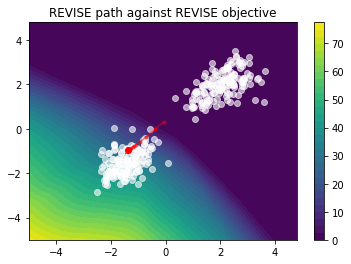

In [42]:
path = revisor.shortest_path_to_target_class(chosen_point, learning_rate=1e-3, max_iter=500)
revisor.show_path(path, x_train)

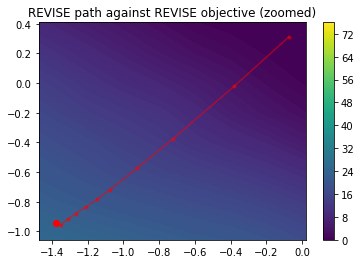

In [43]:
revisor.show_path(path, zoom=True)

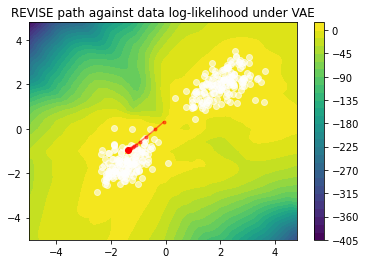

In [44]:
revisor.show_path(path, x_train, landscape='likelihood')

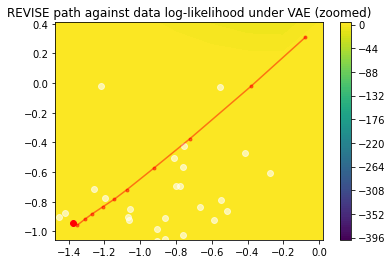

In [45]:
revisor.show_path(path, x_train, zoom=True, landscape='likelihood')

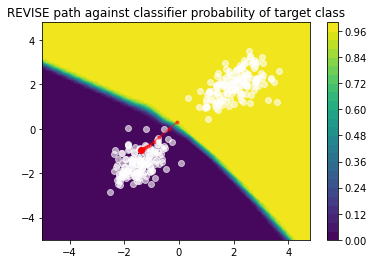

In [46]:
revisor.show_path(path, x_train, landscape='prob_target')

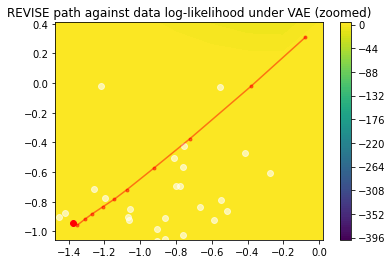

In [47]:
revisor.show_path(path, x_train, zoom=True, landscape='likelihood')